In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [43]:
sampleimage = mnist.train.images[5000]
sampleimage.shape

(784,)

In [5]:
sess= tf.Session()

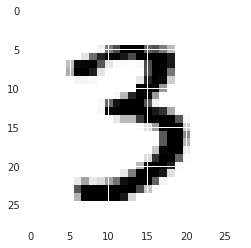

In [44]:
plt.imshow(np.reshape(sampleimage,[28,28])).set_cmap('Greys')

In [7]:
batch_size = 50
learning_rate = 0.001

In [8]:
train_x = np.array(list(np.reshape(x,(28,28)) for x in mnist.train.images))
test_x = np.array(list(np.reshape(x,(28,28)) for x in mnist.test.images))
train_y = np.array(mnist.train.labels)
test_y = np.array(mnist.test.labels)

In [9]:
test_x = np.expand_dims(test_x,3)
test_x.shape

(10000, 28, 28, 1)

In [10]:
train_x = np.expand_dims(train_x,3)
train_x.shape

(55000, 28, 28, 1)

In [11]:
x = tf.placeholder(tf.float32, shape=[None, 784],name = 'Input')

In [12]:
x_input = tf.reshape(x,[-1, 28, 28, 1])
# x_input  = tf.placeholder(tf.float32,shape=[None,28,28,1],name='Input')
y_target= tf.placeholder(tf.float32,shape=[None,10],name='Output')

In [13]:
def weight(shape,name="Weight"):
    initialise = tf.random_normal(shape=shape,mean=0.0,stddev=0.1,dtype=tf.float32,name=name)
    return tf.Variable(initialise)

In [14]:
def conv2d(x,W,name='Convolution'):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME',name=name)

In [15]:
def bias_variable(shape,name='Bias'):
    initial = tf.constant(0.1, shape=shape,name=name,dtype=tf.float32)
    return tf.Variable(initial)

In [16]:
def maxpool2d(x,name='MaxPool'):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME',name=name)

In [17]:
W1 = weight(shape=[5,5,1,32],name='Weight1')
b1 = bias_variable(shape=[32],name='Bias1')

In [18]:
x_input.shape

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)])

In [19]:
H1Layer = tf.nn.relu(tf.add(conv2d(x_input,W1,name='Conv1'),b1,name='Addition'),name='Hidden1')
H1Pool =  maxpool2d(H1Layer,name='Pool1')

In [20]:
W2 = weight(shape=[5,5,32,64],name='Weight2')
b2 = bias_variable(shape=[64],name='Bias2')
W2.shape

TensorShape([Dimension(5), Dimension(5), Dimension(32), Dimension(64)])

In [23]:
H2Layer = tf.nn.relu(tf.add(conv2d(H1Pool,W2,name='Conv2'),b2,name='Addition'),name='Hidden2')
H2Pool =  maxpool2d(H2Layer,name='Pool2')
H2Pool.shape

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(64)])

In [24]:
#Densely Connected
W3_Dense = weight([7*7*64,1024],name = 'Weight3')
W3_Bias  = bias_variable(shape=[1024],name='Bias3')
W3_Dense.shape

TensorShape([Dimension(3136), Dimension(1024)])

In [25]:
H2Flattened = tf.reshape(H2Pool,[-1,7 * 7 * 64])
print(H2Flattened.shape)
print(W3_Dense.shape)
print(W3_Bias.shape)
H3Layer = tf.nn.relu(tf.add(tf.matmul(H2Flattened,W3_Dense,name='ConvFC'),W3_Bias,name='Addition'),name='FC1')

(?, 3136)
(3136, 1024)
(1024,)


In [26]:
keep_prob=tf.placeholder(tf.float32)
hfc1_drop = tf.nn.dropout(H3Layer,keep_prob=keep_prob)

In [27]:
W_fc2 = weight([1024, 10])
b_fc2 = bias_variable([10])

In [28]:
y_conv = tf.matmul(hfc1_drop,W_fc2) + b_fc2
print(y_conv,y_target)

Tensor("add:0", shape=(?, 10), dtype=float32) Tensor("Output:0", shape=(?, 10), dtype=float32)


In [29]:
######SUMMARIZER########
print(x_input)
print(W1)
print(b1)
print(H1Layer)
print(H1Pool)
print(W2)
print(b2)
print(H2Layer)
print(H2Pool)
print(H2Flattened)

Tensor("Reshape:0", shape=(?, 28, 28, 1), dtype=float32)
<tf.Variable 'Variable:0' shape=(5, 5, 1, 32) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(32,) dtype=float32_ref>
Tensor("Hidden1:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Pool1:0", shape=(?, 14, 14, 32), dtype=float32)
<tf.Variable 'Variable_2:0' shape=(5, 5, 32, 64) dtype=float32_ref>
<tf.Variable 'Variable_3:0' shape=(64,) dtype=float32_ref>
Tensor("Hidden2:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Pool2:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)


In [30]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_target,logits=y_conv))
print(loss.dtype)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

<dtype: 'float32'>


In [31]:
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_target, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [32]:
opt = tf.train.AdamOptimizer(learning_rate)

In [33]:
train_step = opt.minimize(loss)

In [34]:
sess= tf.Session()
sess.run(tf.global_variables_initializer())

In [35]:
randIndex = np.random.choice(10,5,replace=False)
print(randIndex)

[4 6 2 3 5]


In [36]:
saver = tf.train.Saver()

In [37]:
writer = tf.summary.FileWriter('./SavedMnistHMap/', sess.graph)

In [38]:
with sess.as_default():
    for i in range(400):
        randIndex = np.random.choice(mnist.train.num_examples,size=batch_size,replace=True)
        X_batch = train_x[randIndex]
        Y_batch = train_y[randIndex]
        
        sess.run(train_step,feed_dict={x_input: X_batch, y_target:Y_batch,keep_prob:0.75})
        
        saver.save(sess,'./SavedMnistHMap/mnist_heatmap',global_step=1000,write_meta_graph=True)
        if i%200 ==0:
            train_accuracy = accuracy.eval(feed_dict={x_input: X_batch, y_target: Y_batch, keep_prob: 0.75})
            print("Epoch:{:d}  Loss: {:f} Train Accuracy: {:f}  ".format(i,sess.run(loss,feed_dict={x_input: X_batch, y_target:Y_batch,keep_prob:1.0}),train_accuracy))

Epoch:0  Loss: 8.273098 Train Accuracy: 0.120000  
Epoch:200  Loss: 0.048323 Train Accuracy: 0.960000  
Epoch:400  Loss: 0.005359 Train Accuracy: 1.000000  
Epoch:600  Loss: 0.010720 Train Accuracy: 1.000000  
Epoch:800  Loss: 0.050853 Train Accuracy: 0.960000  
Epoch:1000  Loss: 0.016467 Train Accuracy: 1.000000  
Epoch:1200  Loss: 0.003804 Train Accuracy: 1.000000  
Epoch:1400  Loss: 0.005039 Train Accuracy: 1.000000  
Epoch:1600  Loss: 0.026596 Train Accuracy: 1.000000  
Epoch:1800  Loss: 0.012485 Train Accuracy: 0.980000  
Epoch:2000  Loss: 0.001640 Train Accuracy: 1.000000  
Epoch:2200  Loss: 0.014506 Train Accuracy: 0.980000  
Epoch:2400  Loss: 0.005485 Train Accuracy: 1.000000  
Epoch:2600  Loss: 0.014974 Train Accuracy: 0.980000  
Epoch:2800  Loss: 0.003128 Train Accuracy: 1.000000  
Epoch:3000  Loss: 0.000199 Train Accuracy: 1.000000  
Epoch:3200  Loss: 0.000395 Train Accuracy: 1.000000  
Epoch:3400  Loss: 0.000987 Train Accuracy: 1.000000  
Epoch:3600  Loss: 0.000222 Train Ac

In [39]:
import math
def getActivations(layer,stimuli,Heatmap=False):
    print(layer)
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],order='F'),keep_prob:1.0})
    plotNNFilter(units,Heatmap=Heatmap)
    
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x),axis=0)

def plotNNFilter(units,Heatmap=False):
    filters = units.shape[3]
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    collect = np.zeros([units.shape[1],units.shape[2]])
    
    if Heatmap:
        for i in range(filters):
            collect = np.add(collect,units[0,:,:,i])
        collect = softmax(collect/units.shape[3])
        import seaborn as sns; sns.set()
        ax = sns.heatmap(collect,cbar=False)
    else:    
        plt.figure(1, figsize=(28,28))
        for i in range(filters):        
            plt.subplot(n_rows, n_columns, i+1)
            plt.title('Filter ' + str(i))
            plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")    

Tensor("Hidden1:0", shape=(?, 28, 28, 32), dtype=float32)


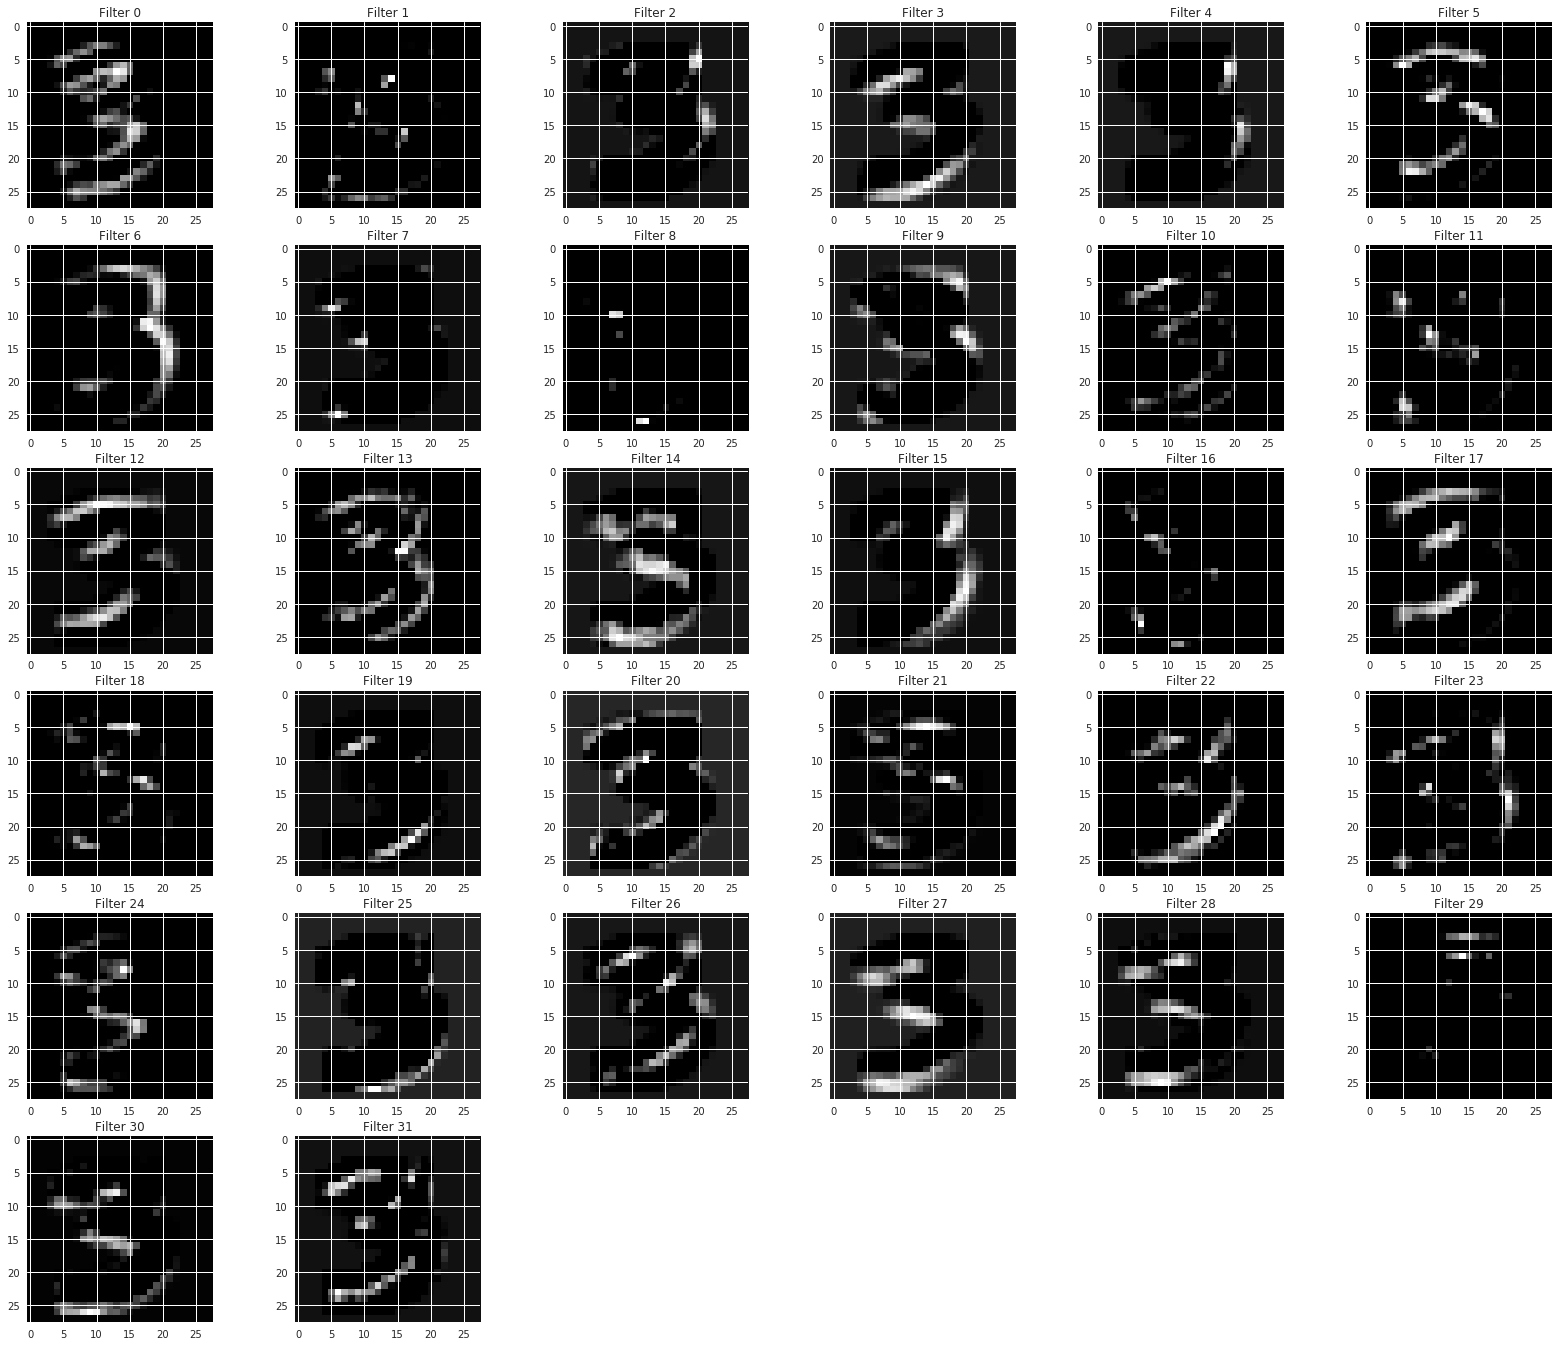

In [46]:
getActivations(H1Layer,sampleimage,Heatmap=False)

Tensor("Hidden1:0", shape=(?, 28, 28, 32), dtype=float32)


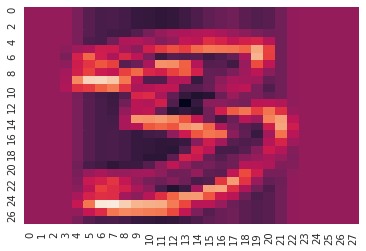

In [47]:
getActivations(H1Layer,sampleimage,Heatmap=True)